In [1]:
import warnings 
import math
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns

from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb
import torch 
import torch.nn as nn

warnings.filterwarnings('ignore', category=RuntimeWarning)
pd.set_option('display.max_columns', None)
plt.style.use(style='ggplot')
%matplotlib inline

In [2]:
df = pd.read_csv("/Users/maheshnukala/Desktop/IIIT/Hackathon/Training_Data_Set.csv")

In [3]:
df.head()

,Id,Maker,model,Location,Distance,Owner Type,manufacture_year,Age of car,engine_displacement,engine_power,body_type,Vroom Audit Rating,transmission,door_count,seat_count,fuel_type,Price
0,25001,skoda,octavia,Ahmedabad,NaN,Second,1964,55,1964,147.0,compact,8,man,None,None,petrol,543764.25
1,25002,fiat,panda,Ahmedabad,27750.0,Third,2012,7,1242,51.0,NaN,6,man,4,4,petrol,401819.25
2,25003,bmw,x1,Hyderabad,46000.0,Third,2014,5,1995,105.0,NaN,7,auto,4,5,diesel,2392855.50
3,25004,nissan,juke,Mumbai,43949.0,Third,2011,8,1618,140.0,NaN,7,man,4,5,petrol,958606.50
4,25005,bmw,x5,Jaipur,59524.0,Fourth & Above,2012,7,2993,180.0,NaN,7,auto,4,5,diesel,3085561.50


In [4]:
df.shape

(53515, 17)

In [5]:
df.describe()

,Id,Distance,manufacture_year,Age of car,engine_displacement,engine_power,Vroom Audit Rating,Price
count,53515.000000,5.230400e+04,53515.000000,53515.000000,53515.000000,52076.000000,53515.000000,5.351500e+04
mean,51758.000000,9.454626e+04,2010.408110,8.591890,1904.049014,100.448345,5.998374,1.098084e+06
std,15448.594165,2.755617e+05,4.650322,4.650322,1496.564596,45.330622,1.418336,8.441565e+05
min,25001.000000,0.000000e+00,1934.000000,3.000000,14.000000,10.000000,4.000000,3.000000e+00
25%,38379.500000,1.549000e+04,2008.000000,5.000000,1395.000000,73.000000,5.000000,5.051812e+05
50%,51758.000000,6.552000e+04,2011.000000,8.000000,1896.000000,91.000000,6.000000,8.854552e+05
75%,65136.500000,1.356410e+05,2014.000000,11.000000,1995.000000,125.000000,7.000000,1.477829e+06
max,78515.000000,9.899800e+06,2016.000000,85.000000,32000.000000,896.000000,8.000000,2.212078e+07


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53515 entries, 0 to 53514
Data columns (total 17 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Id                   53515 non-null  int64  
 1   Maker                53515 non-null  object 
 2   model                53515 non-null  object 
 3   Location             53515 non-null  object 
 4   Distance             52304 non-null  float64
 5   Owner Type           53515 non-null  object 
 6   manufacture_year     53515 non-null  int64  
 7   Age of car           53515 non-null  int64  
 8   engine_displacement  53515 non-null  int64  
 9   engine_power         52076 non-null  float64
 10  body_type            4136 non-null   object 
 11  Vroom Audit Rating   53515 non-null  int64  
 12  transmission         53515 non-null  object 
 13  door_count           53515 non-null  object 
 14  seat_count           53515 non-null  object 
 15  fuel_type            53515 non-null 

In [7]:
df.isnull().sum()

Id                         0
Maker                      0
model                      0
Location                   0
Distance                1211
Owner Type                 0
manufacture_year           0
Age of car                 0
engine_displacement        0
engine_power            1439
body_type              49379
Vroom Audit Rating         0
transmission               0
door_count                 0
seat_count                 0
fuel_type                  0
Price                      0
dtype: int64

In [8]:
test_df = pd.read_csv('/Users/maheshnukala/Desktop/IIIT/Hackathon/Test_Data_Set.csv')

In [9]:
test_df.head()

,Id,Maker,model,Location,Distance,Owner Type,manufacture_year,Age of car,engine_displacement,engine_power,body_type,Vroom Audit Rating,transmission,door_count,seat_count,fuel_type
0,11001,skoda,octavia,Mumbai,150000.0,First,2007,12,1595,75.0,NaN,5,man,4,5,petrol
1,11002,skoda,rapid,Coimbatore,29376.0,Third,2014,5,1598,77.0,NaN,4,man,4,5,diesel
2,11003,skoda,octavia,Coimbatore,30563.0,Second,2014,5,1968,110.0,NaN,5,man,5,5,diesel
3,11004,audi,q3,Delhi,8650.0,Fourth & Above,2015,4,1968,110.0,NaN,8,auto,4,5,diesel
4,11005,audi,tt,Chennai,6400.0,Third,2015,4,1984,169.0,NaN,4,auto,2,None,petrol


In [10]:
df.columns

Index(['Id', 'Maker', 'model', 'Location', 'Distance ', 'Owner Type',
       'manufacture_year', 'Age of car', 'engine_displacement', 'engine_power',
       'body_type', 'Vroom Audit Rating', 'transmission', 'door_count',
       'seat_count', 'fuel_type', 'Price'],
      dtype='object')

In [11]:
test_df.columns

Index(['Id', 'Maker', 'model', 'Location', 'Distance ', 'Owner Type',
       'manufacture_year', 'Age of car', 'engine_displacement', 'engine_power',
       'body_type', 'Vroom Audit Rating', 'transmission', 'door_count',
       'seat_count', 'fuel_type'],
      dtype='object')

In [12]:
df['Maker'].unique()

array(['skoda', 'fiat', 'bmw', 'nissan', 'audi', 'toyota', 'hyundai',
       'maserati'], dtype=object)

In [13]:

df=df.replace('skoda','1').replace('fiat','2').replace('bmw','3').replace('nissan','4').replace('audi','5').replace('toyota','6').replace('hyundai','7').replace('maserati','8')
df=df.replace('octavia','11').replace('panda','12').replace('x1','13').replace('juke','14').replace('x5','15').replace('superb','16').replace('qashqai','17').replace('coupe','18').replace('micra','19').replace('aygo','20').replace('yeti','21').replace('auris','22').replace('q3','23').replace('q5','24').replace('x3','25').replace('avensis','26').replace('i30','27').replace('q7','28').replace('tt','29').replace('citigo','30').replace('yaris','31').replace('roomster','32').replace('rapid','33')


In [14]:
df['Maker']=df['Maker'].astype(float)
df['model']=df['model'].astype(float)

In [15]:
df.head()

,Id,Maker,model,Location,Distance,Owner Type,manufacture_year,Age of car,engine_displacement,engine_power,body_type,Vroom Audit Rating,transmission,door_count,seat_count,fuel_type,Price
0,25001,1.0,11.0,Ahmedabad,NaN,Second,1964,55,1964,147.0,compact,8,man,None,None,petrol,543764.25
1,25002,2.0,12.0,Ahmedabad,27750.0,Third,2012,7,1242,51.0,NaN,6,man,4,4,petrol,401819.25
2,25003,3.0,13.0,Hyderabad,46000.0,Third,2014,5,1995,105.0,NaN,7,auto,4,5,diesel,2392855.50
3,25004,4.0,14.0,Mumbai,43949.0,Third,2011,8,1618,140.0,NaN,7,man,4,5,petrol,958606.50
4,25005,3.0,15.0,Jaipur,59524.0,Fourth & Above,2012,7,2993,180.0,NaN,7,auto,4,5,diesel,3085561.50


In [16]:
df.isnull().sum()

Id                         0
Maker                      0
model                      0
Location                   0
Distance                1211
Owner Type                 0
manufacture_year           0
Age of car                 0
engine_displacement        0
engine_power            1439
body_type              49379
Vroom Audit Rating         0
transmission               0
door_count                 0
seat_count                 0
fuel_type                  0
Price                      0
dtype: int64

In [17]:
df['Location'].unique()

array(['Ahmedabad', 'Hyderabad', 'Mumbai', 'Jaipur', 'Chennai',
       'Coimbatore', 'Kochi', 'Bangalore', 'Pune', 'Kolkata', 'Delhi'],
      dtype=object)

In [18]:
df=df.replace('Ahmedabad','90').replace('Hyderabad','91').replace('Mumbai','92').replace('Jaipur','93').replace('Chennai','94').replace('Coimbatore','95').replace('Kochi','96').replace('Bangalore','97').replace('Pune','98').replace('Kolkata','99').replace('Delhi','00')

In [19]:
df['Location'].unique()

array(['90', '91', '92', '93', '94', '95', '96', '97', '98', '99', '00'],
      dtype=object)

In [20]:
df['Location']=df['Location'].astype(float)

In [21]:
df['Owner Type'].unique()

array(['Second', 'Third', 'Fourth & Above', 'First'], dtype=object)

In [22]:
df=df.replace('Second','222').replace('Third','333').replace('Fourth & Above','444').replace('First','111')

In [23]:
df['Owner Type'].unique()

array(['222', '333', '444', '111'], dtype=object)

In [24]:
df['Owner Type']=df['Owner Type'].astype(float)

In [25]:
df.head()

,Id,Maker,model,Location,Distance,Owner Type,manufacture_year,Age of car,engine_displacement,engine_power,body_type,Vroom Audit Rating,transmission,door_count,seat_count,fuel_type,Price
0,25001,1.0,11.0,90.0,NaN,222.0,1964,55,1964,147.0,compact,8,man,None,None,petrol,543764.25
1,25002,2.0,12.0,90.0,27750.0,333.0,2012,7,1242,51.0,NaN,6,man,4,4,petrol,401819.25
2,25003,3.0,13.0,91.0,46000.0,333.0,2014,5,1995,105.0,NaN,7,auto,4,5,diesel,2392855.50
3,25004,4.0,14.0,92.0,43949.0,333.0,2011,8,1618,140.0,NaN,7,man,4,5,petrol,958606.50
4,25005,3.0,15.0,93.0,59524.0,444.0,2012,7,2993,180.0,NaN,7,auto,4,5,diesel,3085561.50


In [26]:
df['body_type'].unique()

array(['compact', nan, 'van'], dtype=object)

In [27]:
df= df.replace('compact','55').replace('van','66')

In [28]:
df['body_type'].unique()

array(['55', nan, '66'], dtype=object)

In [29]:
sum(df['body_type']=='66')

9

In [30]:
df['body_type'] = df['body_type'].replace(np.nan, 66)

In [31]:
df['body_type'].unique()

array(['55', 66, '66'], dtype=object)

In [32]:
df['body_type']=df['body_type'].astype(float)

In [33]:
df['Age of car'].unique()

array([55,  7,  5,  8,  4, 10,  9, 20,  6, 12, 15, 17, 13, 11, 14, 19, 18,
       16, 21, 39, 29, 24,  3, 23, 22, 25, 51, 26, 27, 28, 69, 48, 31, 30,
       35, 46, 36, 34, 53, 37, 85, 60, 63, 57, 67, 64, 50, 59, 33, 45, 32,
       47, 38, 43, 56])

In [34]:
df['transmission'].unique()

array(['man', 'auto'], dtype=object)

In [35]:
df= df.replace('man','88').replace('auto','77')

In [36]:
df['transmission'].unique()

array(['88', '77'], dtype=object)

In [37]:
df['transmission']=df['transmission'].astype(float)

In [38]:
df['door_count'].unique()

array(['None', '4', '5', '2', '3', '1', '6'], dtype=object)

In [39]:
df= df.replace('None','4')

In [40]:
df['door_count'].unique()

array(['4', '5', '2', '3', '1', '6'], dtype=object)

In [41]:
df['door_count']=df['door_count'].astype(float)

In [42]:
df['seat_count'].unique()

array(['4', '5', '2', '3', '7', '6', '1', '9', '8'], dtype=object)

In [43]:
df['seat_count']=df['seat_count'].astype(float)

In [44]:
df['fuel_type'].unique()

array(['petrol', 'diesel'], dtype=object)

In [45]:
df= df.replace('petrol','0000').replace('diesel','1111')

In [46]:
df['fuel_type'].unique()

array(['0000', '1111'], dtype=object)

In [47]:
df['fuel_type']=df['fuel_type'].astype(float)

In [60]:
df['engine_power'] = df['engine_power'].replace(np.nan,125.000000 )
df['Distance '] = df['Distance '].replace(np.nan, 9.454626e+04)


In [61]:
df['engine_power']=df['engine_power'].astype(float)
df['Distance ']=df['Distance '].astype(float)

In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53515 entries, 0 to 53514
Data columns (total 17 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Id                   53515 non-null  int64  
 1   Maker                53515 non-null  float64
 2   model                53515 non-null  float64
 3   Location             53515 non-null  float64
 4   Distance             53515 non-null  float64
 5   Owner Type           53515 non-null  float64
 6   manufacture_year     53515 non-null  int64  
 7   Age of car           53515 non-null  int64  
 8   engine_displacement  53515 non-null  int64  
 9   engine_power         53515 non-null  float64
 10  body_type            53515 non-null  float64
 11  Vroom Audit Rating   53515 non-null  int64  
 12  transmission         53515 non-null  float64
 13  door_count           53515 non-null  float64
 14  seat_count           53515 non-null  float64
 15  fuel_type            53515 non-null 

In [51]:
df_feature = df.drop(['Price'], axis=1)
df_target = df.Price
df_feature.shape, df_target.shape

((53515, 16), (53515,))

In [62]:
corre=df.corr()
corre

,Id,Maker,model,Location,Distance,Owner Type,manufacture_year,Age of car,engine_displacement,engine_power,body_type,Vroom Audit Rating,transmission,door_count,seat_count,fuel_type,Price
Id,1.000000,0.001951,0.005443,0.006571,-0.000279,-0.005769,0.001935,-0.001935,0.003698,0.002243,0.006882,0.005602,-0.005550,-0.005810,0.002489,-0.001921,0.003195
Maker,0.001951,1.000000,0.522879,-0.000067,-0.096183,0.001166,0.098156,-0.098156,-0.029522,0.103468,0.214407,-0.004459,-0.077202,-0.327378,0.012481,-0.134853,0.167444
model,0.005443,0.522879,1.000000,-0.004809,-0.100732,0.008655,0.184303,-0.184303,-0.066601,-0.026463,0.183176,0.002909,-0.025839,-0.198986,0.016781,-0.177887,0.116445
Location,0.006571,-0.000067,-0.004809,1.000000,0.005306,-0.002221,-0.006115,0.006115,0.005436,-0.003632,0.002563,-0.000397,0.000991,0.000589,0.000608,-0.005124,-0.002946
Distance,-0.000279,-0.096183,-0.100732,0.005306,1.000000,-0.006642,-0.220387,0.220387,0.094056,0.013835,-0.203442,-0.006229,0.017285,0.028727,-0.050253,0.013961,-0.157168
Owner Type,-0.005769,0.001166,0.008655,-0.002221,-0.006642,1.000000,0.005409,-0.005409,-0.004116,-0.002925,0.003512,-0.003931,0.002788,0.001360,0.002068,0.000428,-0.003600
manufacture_year,0.001935,0.098156,0.184303,-0.006115,-0.220387,0.005409,1.000000,-1.000000,-0.090401,0.050724,0.252268,0.003985,-0.127930,0.118545,0.100646,0.112386,0.506707
Age of car,-0.001935,-0.098156,-0.184303,0.006115,0.220387,-0.005409,-1.000000,1.000000,0.090401,-0.050724,-0.252268,-0.003985,0.127930,-0.118545,-0.100646,-0.112386,-0.506707
engine_displacement,0.003698,-0.029522,-0.066601,0.005436,0.094056,-0.004116,-0.090401,0.090401,1.000000,0.312480,-0.259181,-0.005828,-0.207715,0.018502,-0.030327,0.125746,0.162072
engine_power,0.002243,0.103468,-0.026463,-0.003632,0.013835,-0.002925,0.050724,-0.050724,0.312480,1.000000,0.050893,-0.001199,-0.501451,-0.078433,0.079161,0.287383,0.615084


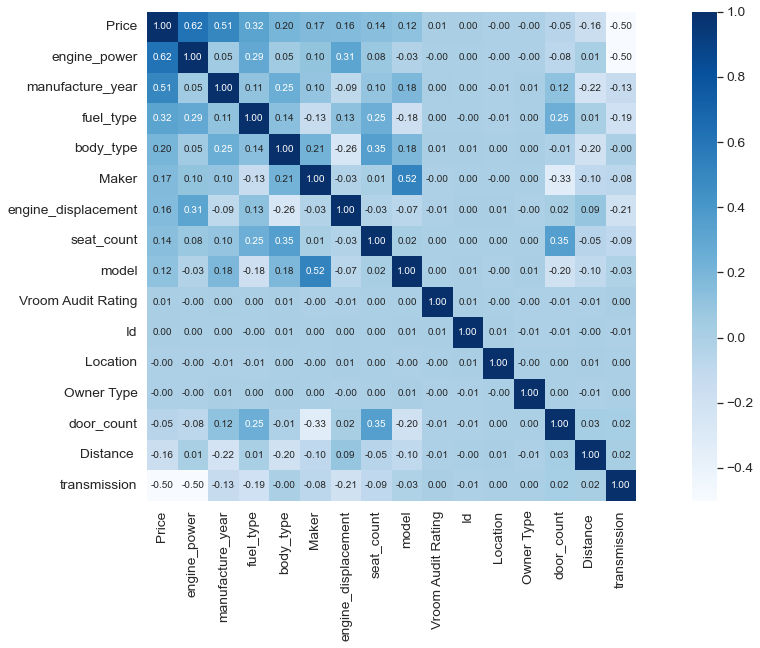

In [63]:
plt.figure(figsize=(20, 9))
k=16
cols = corre.nlargest(k, 'Price')['Price'].index
cm = np.corrcoef(df[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, 
                 yticklabels=cols.values, xticklabels=cols.values,cmap="Blues")
plt.show()

In [64]:
from sklearn.model_selection import train_test_split 

X_train, X_validation, y_train, y_validation = train_test_split(df_feature, df_target, test_size=0.3, random_state=2209)
X_train.shape, X_validation.shape, y_train.shape, y_validation.shape


((37460, 16), (16055, 16), (37460,), (16055,))

In [65]:
from sklearn.model_selection import train_test_split 

X_train, X_validation, y_train, y_validation = train_test_split(df_feature, df_target, test_size=0.3, random_state=2209)
X_train.shape, X_validation.shape, y_train.shape, y_validation.shape


((37460, 16), (16055, 16), (37460,), (16055,))

In [66]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

def evaluate_regr(y,pred):
    # MAE
    mae = mean_absolute_error(y,pred)
    
    # RMSE
    rmse = np.sqrt(mean_squared_error(y,pred))
    
    # RMSLE
    log_y = np.log1p(y)
    log_pred = np.log1p(pred)
    msle = np.mean((log_y - log_pred) ** 2)
    rmsle = np.sqrt(msle)    
    
    print(f'MAE: {mae:.3f}, RMSE: {rmse:.3f}, RMSLE: {rmsle:.3f}')

In [67]:
from sklearn.linear_model import LinearRegression , Ridge , Lasso

lr_reg = LinearRegression()
lr_reg.fit(X_train, y_train)
pred = lr_reg.predict(X_validation)

evaluate_regr(y_validation, pred)


MAE: 312490.083, RMSE: 479348.496, RMSLE: 0.499


In [58]:
def get_model_predict(model, X_train, X_validation, y_train, y_validation):
    model.fit(X_train, y_train)
    pred = model.predict(X_validation)

    print('#',model.__class__.__name__,)
    evaluate_regr(y_validation, pred) 

lr_reg = LinearRegression()
ridge_reg = Ridge(alpha=10)
lasso_reg = Lasso(alpha=0.01)

for model in [lr_reg, ridge_reg, lasso_reg]:
    get_model_predict(model, X_train, X_validation, y_train, y_validation)

# LinearRegression
MAE: 312490.083, RMSE: 479348.496, RMSLE: 0.499
# Ridge
MAE: 312488.071, RMSE: 479349.070, RMSLE: 0.499
# Lasso
MAE: 312490.082, RMSE: 479348.497, RMSLE: 0.499


In [68]:
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor

rf_reg = RandomForestRegressor(n_estimators=10000)
#gbm_reg = GradientBoostingRegressor(n_estimators=6000)
#xgb_reg = XGBRegressor(n_estimators=6000)
#lgbm_reg = LGBMRegressor(n_estimators=6000)

for model in [rf_reg]:
    get_model_predict(model,X_train, X_validation, y_train, y_validation)

# RandomForestRegressor
MAE: 109889.557, RMSE: 202224.339, RMSLE: 0.273


In [ ]:
df.describe(

In [69]:
test_df.describe()

,Id,Distance,manufacture_year,Age of car,engine_displacement,engine_power,Vroom Audit Rating
count,5615.000000,5.487000e+03,5615.000000,5615.000000,5615.000000,5447.000000,5615.00000
mean,13808.000000,9.589009e+04,2010.487622,8.512378,1875.839003,99.474573,5.99537
std,1621.055212,3.088547e+05,4.737177,4.737177,1402.871783,45.483800,1.39901
min,11001.000000,0.000000e+00,1950.000000,3.000000,100.000000,10.000000,4.00000
25%,12404.500000,1.441000e+04,2008.000000,5.000000,1390.000000,73.000000,5.00000
50%,13808.000000,6.400000e+04,2012.000000,7.000000,1798.000000,88.000000,6.00000
75%,15211.500000,1.338490e+05,2014.000000,11.000000,1984.000000,125.000000,7.00000
max,16615.000000,9.143000e+06,2016.000000,69.000000,32000.000000,968.000000,8.00000


In [70]:
test_df=test_df.replace('skoda','1').replace('fiat','2').replace('bmw','3').replace('nissan','4').replace('audi','5').replace('toyota','6').replace('hyundai','7').replace('maserati','8')
test_df=test_df.replace('octavia','11').replace('panda','12').replace('x1','13').replace('juke','14').replace('x5','15').replace('superb','16').replace('qashqai','17').replace('coupe','18').replace('micra','19').replace('aygo','20').replace('yeti','21').replace('auris','22').replace('q3','23').replace('q5','24').replace('x3','25').replace('avensis','26').replace('i30','27').replace('q7','28').replace('tt','29').replace('citigo','30').replace('yaris','31').replace('roomster','32').replace('rapid','33')
test_df=test_df.replace('Ahmedabad','90').replace('Hyderabad','91').replace('Mumbai','92').replace('Jaipur','93').replace('Chennai','94').replace('Coimbatore','95').replace('Kochi','96').replace('Bangalore','97').replace('Pune','98').replace('Kolkata','99').replace('Delhi','00')
test_df=test_df.replace('Second','222').replace('Third','333').replace('Fourth & Above','444').replace('First','111')
test_df=test_df.replace('compact','55').replace('van','66')
test_df=test_df.replace('man','88').replace('auto','77')
test_df=test_df.replace('petrol','0000').replace('diesel','1111')


In [72]:
test_df['Maker']=test_df['Maker'].astype(float)
test_df['model']=test_df['model'].astype(float)
test_df['Location']=test_df['Location'].astype(float)
test_df['Owner Type']=test_df['Owner Type'].astype(float)
test_df['body_type']=test_df['body_type'].astype(float)
test_df['transmission']=test_df['transmission'].astype(float)
test_df['door_count']=test_df['door_count'].astype(float)
test_df['seat_count']=test_df['seat_count'].astype(float)
test_df['fuel_type']=test_df['fuel_type'].astype(float)

In [71]:
test_df= test_df.replace('None','4')
test_df['engine_power'] = test_df['engine_power'].replace(np.nan, 99.474573)
test_df['Distance '] = test_df['Distance '].replace(np.nan, 9.589009e+04)
test_df['body_type'] = test_df['body_type'].replace(np.nan, 66)



In [ ]:
test_df.head()

In [73]:
prediction = rf_reg.predict(test_df)
prediction[0:20] 

array([ 382919.5872  ,  979176.10215 , 1835673.4173  , 2424107.0955  ,
       3024384.13605 , 2705856.09765 , 3236542.277925, 2620383.231525,
        442656.465825, 1380863.2224  , 3553983.665475, 1498876.542825,
       1510112.655075, 1842257.84985 ,  684435.668175, 1001659.31955 ,
       2252582.612325,  240978.41685 ,  716829.803925,  440367.8685  ])

In [ ]:
prediction_gbm = gbm_reg.predict(test_df)
prediction_gbm[0:20]

In [ ]:
prediction_xgb = xgb_reg.predict(test_df)
prediction_xgb[0:20]

In [ ]:
prediction_lgbm = lgbm_reg.predict(test_df)
prediction_lgbm[0:20]

In [ ]:
np.any(np.isnan(test_df['engine_power']))

In [ ]:
np.all(np.isfinite(test_df))

In [ ]:
test_df.info()

In [74]:
submission = pd.DataFrame({'Id':test_df['Id'],'Price':prediction}) 
submission.head(10)

,Id,Price
0,11001,3.829196e+05
1,11002,9.791761e+05
2,11003,1.835673e+06
3,11004,2.424107e+06
4,11005,3.024384e+06
5,11006,2.705856e+06
6,11007,3.236542e+06
7,11008,2.620383e+06
8,11009,4.426565e+05
9,11010,1.380863e+06


In [75]:
submission.columns

Index(['Id', 'Price'], dtype='object')

In [76]:
submission.set_index('Id', inplace=True)

In [77]:
filename = 'submission10krfgg.csv'

submission.to_csv(filename,index=True)

print('Saved file: ' + filename)

Saved file: submission10krfgg.csv
